In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/CNN cats and dogs/dataset/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/CNN cats and dogs/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


In [ ]:
#Build CNN Model
cnn = tf.keras.models.Sequential()


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu',
                                input_shape = [64,64,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
#add 1 more layer 
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [ ]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [ ]:
#output layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#compile the model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'] )

In [49]:
#Train The Model
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs =20)

Epoch 1/20
251/251 [==============================] - 80s 318ms/step - loss: 0.4658 - accuracy: 0.7780 - val_loss: 0.5224 - val_accuracy: 0.7617
Epoch 2/20
251/251 [==============================] - 80s 318ms/step - loss: 0.4516 - accuracy: 0.7883 - val_loss: 0.4721 - val_accuracy: 0.7781
Epoch 3/20
251/251 [==============================] - 80s 318ms/step - loss: 0.4341 - accuracy: 0.7975 - val_loss: 0.4634 - val_accuracy: 0.7958
Epoch 4/20
251/251 [==============================] - 80s 318ms/step - loss: 0.4176 - accuracy: 0.8071 - val_loss: 0.5102 - val_accuracy: 0.7746
Epoch 5/20
251/251 [==============================] - 80s 318ms/step - loss: 0.4123 - accuracy: 0.8130 - val_loss: 0.4895 - val_accuracy: 0.7736
Epoch 6/20
251/251 [==============================] - 80s 317ms/step - loss: 0.3729 - accuracy: 0.8319 - val_loss: 0.4677 - val_accuracy: 0.8028
Epoch 7/20
251/251 [==============================] - 80s 320ms/step - loss: 0.3763 - accuracy: 0.8291 - val_loss: 0.4464 - val_ac

In [50]:
#make single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/drive/MyDrive/CNN cats and dogs/dataset/single_prediction/predict1.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == -1:
  prediction  = 'dog'
else:
  prediction = 'cat'


In [47]:
prediction

'cat'

In [52]:
import matplotlib.pyplot as plt
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


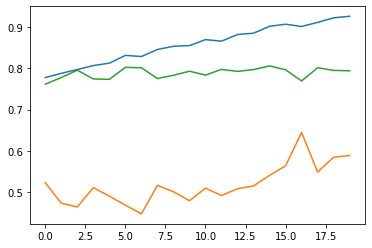

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])